🔍 Project Overview
This project explores a dataset containing advertising budgets across three channels — TV(1,000$), Radio(1,000$), and Newspaper(1,000$) — and aims to predict Sales (M $) based on these investments using Linear Regression.

Dataset: Advertising Budget and Sales.csv

Dataset Information
TV: Advertising budget spent on TV (in thousands of dollars)

Radio: Advertising budget spent on Radio (in thousands of dollars)

Newspaper: Advertising budget spent on Newspaper (in thousands of dollars)

Sales ($): Actual sales result (in thousands of dollars)

 Objective
Understand the relationship between ad spending and sales

Predict sales based on investment strategy

Identify which channel yields the best ROI

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

Overviews Dataset

In [2]:
dt = pd.read_csv("dataset//Advertising Budget and Sales.csv").drop(columns="Unnamed: 0")
dt

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Correlation 

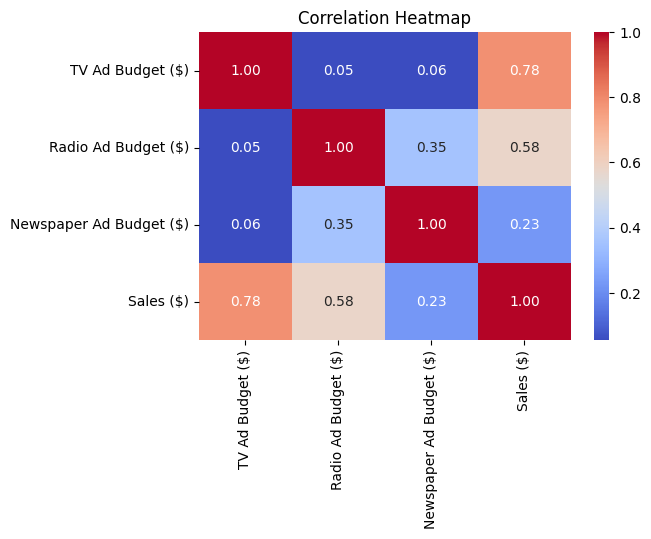

In [3]:
corr = dt.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

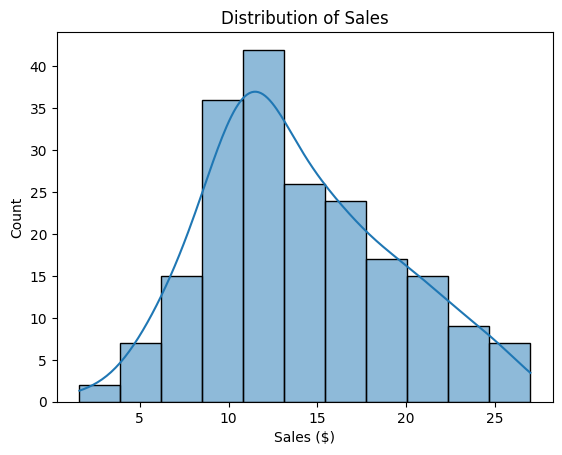

In [4]:
sb.histplot(dt["Sales ($)"], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales ($)")
plt.show()


Model Building Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x = dt.drop(columns="Sales ($)")
y = dt["Sales ($)"]
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_tr, y_tr)
predicted = model.predict(x_t)

print("R2 Score:", r2_score(y_t, predicted))
print("Mean Squared Error:", mean_squared_error(y_t, predicted))


R2 Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


Result
R² Score: 89.94 % 

Indicates that r2score of the variance in Sales is explained by the advertising budgets.

Mean Squared Error: 3.17

A low MSE value suggests high model accuracy on test data.

In [6]:
#check what parameter is importance  
coef = model.coef_
print("TV:", coef[0])
print("Radio:", coef[1])
print("Newspaper:", coef[2])


TV: 0.044729517468716326
Radio: 0.18919505423437652
Newspaper: 0.0027611143413671935


Radio has the strongest positive influence on sales.

TV also contributes positively.

Newspaper shows near-zero or even slightly negative influence.

From sample 
If a company invests:

TV: $230

Radio: $37.8

Newspaper: $69.2

Predicted Sales: ≈ $17.63 (using the regression formula)


In [7]:
tv, radio, newspaper   = (i for i in model.coef_)
sale = (tv*230) + (radio*37.8) + (newspaper*69.2)
sale  

np.float64(17.6304311802868)

Conclusion
Investing in Radio provides the best return for boosting sales.

TV also has a significant positive impact.

Newspaper offers little to no added value — may not be worth the investment.